## Exploration of data set

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from calc_observables import *
figwidth = 6.224
golden_ratio = 1.61803
figsize = (figwidth, figwidth / golden_ratio)
import matplotlib as mpl
# plt.style.use('seaborn-white')
sns.set_style("ticks")
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['figure.figsize'] = figsize

# PATH = 'C:\\Users\\simon\\PycharmProjects\\covid\\raw_data\\covid_de\\'
# PATH = 'C:\\Users\\simon\\Google Drive\\Work\\COVID-19\\data\\kaggle\\'
PATH = './'

In [2]:
%matplotlib inline

In [3]:
# df = pd.read_csv(PATH+'full_grouped.csv', parse_dates =["Date"])  # dataset from kaggle: https://www.kaggle.com/imdevskp/corona-virus-report
df = pd.read_csv(PATH+'covid_19_data.csv', parse_dates =["ObservationDate", 'Last Update'])  # more up-to-date dataset from kaggle: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

In [4]:
interesting_countries = ['US', 'Italy', 'Germany', 'France', 'United Kingdom', 'Switzerland', 'Austria', 'Sweden',
                         'Russia', ]
populations = pd.read_csv(PATH+'worldometer_data.csv', index_col='Country/Region', delimiter=';')['Population'] # get info on population from worldometer
df.rename(columns={'Country/Region': 'Country', 'ObservationDate': 'Date'}, inplace=True)
df = df.loc[df['Country'].isin(interesting_countries)].reset_index()
df.drop(['Last Update', 'Province/State', 'SNo'], axis=1, inplace=True)

In [5]:
df = df.groupby(['Country', 'Date']).agg(sum).reset_index().drop(['index'], axis=1)

In [6]:
df['New cases'] = df.groupby('Country')['Confirmed'].diff()

In [7]:
calc_observables(df, populations)

/home/simon/PycharmProjects/covid/calc_observables.py:34: RuntimeWarning: divide by zero encountered in true_divide
  R[tlag:] = active[tlag:] / active[:-tlag]
/home/simon/PycharmProjects/covid/calc_observables.py:34: RuntimeWarning: invalid value encountered in true_divide
  R[tlag:] = active[tlag:] / active[:-tlag]


In [8]:
df.head()

,Country,Date,Confirmed,Deaths,Recovered,New cases,Confirmed pm,New cases pm,Mean new cases,Mean new cases pm,Population,Shifted Date,Shifted Date pm,R
0,Austria,2020-02-25,2.0,0.0,0.0,NaN,0.221937,NaN,NaN,NaN,9011577.0,-16,-8,0.0
1,Austria,2020-02-26,2.0,0.0,0.0,0.0,0.221937,0.000000,NaN,NaN,9011577.0,-15,-7,0.0
2,Austria,2020-02-27,3.0,0.0,0.0,1.0,0.332905,0.110968,NaN,NaN,9011577.0,-14,-6,0.0
3,Austria,2020-02-28,3.0,0.0,0.0,0.0,0.332905,0.000000,NaN,NaN,9011577.0,-13,-5,0.0
4,Austria,2020-02-29,9.0,0.0,0.0,6.0,0.998715,0.665810,2.714286,0.3012,9011577.0,-12,-4,0.0


(1, 151622.26749021962)

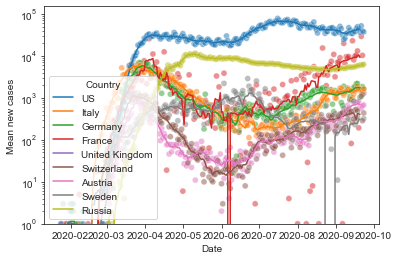

In [9]:
sns.lineplot(data=df, x='Date', y='Mean new cases', hue='Country', hue_order=interesting_countries, ci=None,
            legend='brief')
sns.scatterplot(data=df, x='Date', y='New cases', hue='Country', hue_order=interesting_countries, ci=None,
            legend=False, linewidths=0, alpha=0.5)
plt.yscale('log')
plt.ylim(1)

(1, 2342.980394908401)

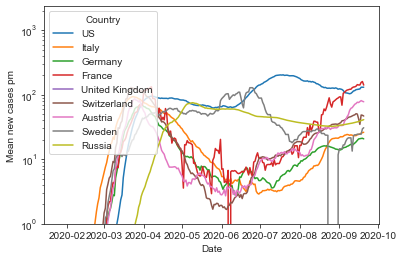

In [10]:
# sb.lineplot(data=df, x='Date', y='Active', hue='Country', hue_order=interesting_countries, estimator=sum, ci=None)
sns.lineplot(data=df, x='Date', y='Mean new cases pm', hue='Country', hue_order=interesting_countries, ci=None,
            legend='brief')
# sb.scatterplot(data=df, x='Date', y='New cases pm', hue='Country', hue_order=interesting_countries, ci=None,
#             legend=False, linewidths=0, alpha=0.5)
plt.yscale('log')
plt.ylim(1)

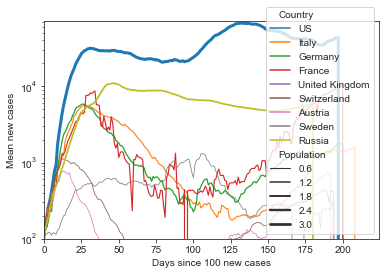

In [11]:
sns.lineplot(data=df.loc[df['Country'].isin(interesting_countries)], x='Shifted Date', y='Mean new cases', hue='Country',
            hue_order=interesting_countries, estimator=sum, ci=None, size='Population')
plt.xlim(0)
plt.xlabel('Days since 100 new cases')
plt.ylabel('Mean new cases')
plt.ylim(100)
plt.yscale('log')

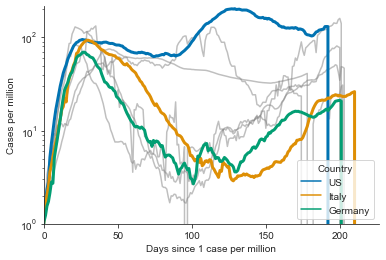

In [12]:
coloredcountries = interesting_countries[:3]
graycountries = interesting_countries[3:]
sns.lineplot(data=df.loc[df['Country'].isin(coloredcountries)], x='Shifted Date pm', linewidth=3, palette='colorblind',
            y='Mean new cases pm', hue='Country', hue_order=coloredcountries, estimator=sum, ci=None)
sns.lineplot(data=df.loc[df['Country'].isin(graycountries)], x='Shifted Date pm', palette=['Gray']*len(interesting_countries[3:]),
            alpha=0.5, y='Mean new cases pm', hue='Country', hue_order=graycountries, estimator=sum, ci=None, legend=False, zorder=-1)
plt.xlim(0)
plt.ylim(1)
plt.xlabel('Days since 1 case per million')
plt.ylabel('Cases per million')
plt.yscale('log')
sns.despine()
# plt.savefig(PATH+'casespm.svg')

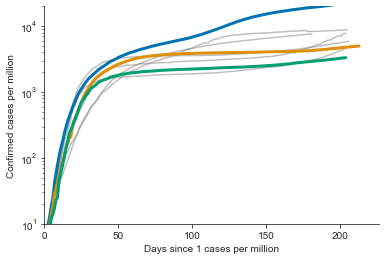

In [13]:
sns.lineplot(data=df.loc[df['Country'].isin(coloredcountries)], x='Shifted Date pm', y='Confirmed pm', linewidth=3,
            hue='Country', hue_order=coloredcountries, estimator=sum, ci=None, legend=False, palette='colorblind')
sns.lineplot(data=df.loc[df['Country'].isin(graycountries)], x='Shifted Date pm', palette=['Gray']*len(interesting_countries[3:]),
            alpha=0.5, y='Confirmed pm', hue='Country', hue_order=graycountries, estimator=sum, ci=None, legend=False, zorder=-1)
plt.xlim(0)
plt.xlabel('Days since 1 cases per million')
plt.ylabel('Confirmed cases per million')
plt.ylim(1e1, 2e4)
plt.yscale('log')
sns.despine()
# plt.savefig(PATH+'confirmedpm.svg')

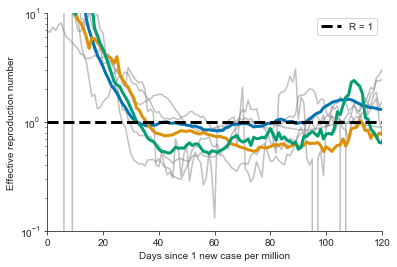

In [14]:
sns.lineplot(data=df.loc[df['Country'].isin(coloredcountries)], x='Shifted Date pm', y='R', linewidth=3, palette='colorblind',
            hue='Country', hue_order=coloredcountries, estimator=sum, ci=None, legend=False)
sns.lineplot(data=df.loc[df['Country'].isin(graycountries)], x='Shifted Date pm', palette=['Gray']*len(interesting_countries[3:]),
            alpha=0.5, y='R', hue='Country', hue_order=graycountries, estimator=sum, ci=None, legend=False, zorder=-1)
plt.xlim(0, 120)
plt.ylim(0.1, 10)
plt.plot([0, 200], [1, 1], 'k--', label='R = 1', lw=3)
plt.yscale('log')
plt.xlabel('Days since 1 new case per million')
plt.ylabel('Effective reproduction number')
plt.legend()
sns.despine()
# plt.savefig(PATH+'reff.svg')

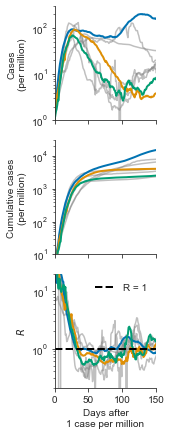

In [15]:
# plt.rc('text', usetex=True)
w = 0.4 * figwidth
fig, axs = plt.subplots(nrows=3, ncols=1, sharey=False, sharex=True, figsize=(w, 4/golden_ratio*w))
plt.sca(axs[0])
# plt.title('Cases (per mil)')
sns.lineplot(data=df.loc[df['Country'].isin(coloredcountries)], x='Shifted Date pm', linewidth=2, palette='colorblind',
            y='Mean new cases pm', hue='Country', hue_order=coloredcountries, estimator=sum, ci=None, legend=False)
sns.lineplot(data=df.loc[df['Country'].isin(graycountries)], x='Shifted Date pm', palette=['Gray']*len(interesting_countries[3:]),
            alpha=0.5, y='Mean new cases pm', hue='Country', hue_order=graycountries, estimator=sum, ci=None, legend=False, zorder=-1)
plt.ylim(1, 3e2)
plt.ylabel('')
plt.ylabel('Cases\n(per million)')
plt.yscale('log')
sns.despine()


plt.sca(axs[1])
# plt.title('Cumulative cases (per mil)')
sns.lineplot(data=df.loc[df['Country'].isin(coloredcountries)], x='Shifted Date pm', y='Confirmed pm', linewidth=2, palette='colorblind',
            hue='Country', hue_order=coloredcountries, estimator=sum, ci=None, legend=False)
sns.lineplot(data=df.loc[df['Country'].isin(graycountries)], x='Shifted Date pm', palette=['Gray']*len(interesting_countries[3:]),
            alpha=0.5, y='Confirmed pm', hue='Country', hue_order=graycountries, estimator=sum, ci=None, legend=False, zorder=-1)
plt.ylabel('Cumulative cases\n(per million)')
# plt.ylabel('')
plt.ylim(1e1, 3e4)
plt.yscale('log')
sns.despine()


plt.sca(axs[2])
# plt.title('Reproduction number')
sns.lineplot(data=df.loc[df['Country'].isin(coloredcountries)], x='Shifted Date pm', y='R', linewidth=2, palette='colorblind',
            hue='Country', hue_order=coloredcountries, estimator=sum, ci=None, legend=False)
sns.lineplot(data=df.loc[df['Country'].isin(graycountries)], x='Shifted Date pm', palette=['Gray']*len(interesting_countries[3:]),
            alpha=0.5, y='R', hue='Country', hue_order=graycountries, estimator=sum, ci=None, legend=False, zorder=-1)
plt.xlim(0, 150)
plt.ylim(0.2, 20)
plt.plot([0, 200], [1, 1], 'k--', label='R = 1', lw=2)
plt.yscale('log')
plt.ylabel('$R$')
# plt.xlabel('')
# plt.ylabel('')
plt.xlabel('Days after\n1 case per million')
plt.legend(loc='upper right', frameon=False)
sns.despine()
plt.tight_layout()
# plt.savefig(PATH+'Fig1_1.svg')

In [16]:
dfd = df.loc[df.Country == 'Germany']

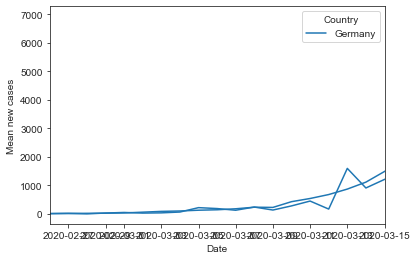

In [17]:
import datetime

sns.lineplot(data=df, x='Date', y='Mean new cases', hue='Country', hue_order=['Germany'], ci=None,
            legend='brief')
sns.lineplot(data=df, x='Date', y='New cases', hue='Country', hue_order=['Germany'], ci=None,
            legend=False)
# sb.scatterplot(data=df, x='Date', y='New cases pm', hue='Country', hue_order=interesting_countries, ci=None,
#             legend=False, linewidths=0, alpha=0.5)
# plt.yscale('log')
# plt.ylim(1, 1e2)
plt.xlim([datetime.date(2020, 2, 26), datetime.date(2020, 3, 15)])
# plt.xlim([datetime.date(2020, 3, 16), datetime.date(2020, 6, 6)])
# plt.xlim([t1, t2])
plt.show()

In [42]:
t1 = datetime.datetime(2020, 3, 16)
t2 = datetime.datetime(2020, 6, 6)
meancasespm_mar16_jun6 = dfd[(dfd.Date < t2) & (dfd.Date > t1)]['Mean new cases pm'].to_numpy()
casespm_mar16_jun6 = dfd[(dfd.Date < t2) & (dfd.Date > t1)]['New cases pm'].to_numpy()
cases_mar16_jun6 = dfd[(dfd.Date < t2) & (dfd.Date > t1)]['New cases'].to_numpy()
# np.save('casespm_de_mar16_jun21.npy', df[(df.Date < t2) & (df.Date > t1) & (df.Country == 'Germany')]['Mean new cases pm'].to_numpy())

In [19]:
np.abs(meancasespm_mar16_jun6 - casespm_mar16_jun6).sum()

460.902951976347

In [43]:
cases_mar16_jun6.sum()

177652.0

In [38]:
t1 = datetime.datetime(2020, 2, 26)
t2 = datetime.datetime(2020, 3, 16)
meancases_feb26_mar15 = dfd[(dfd.Date < t2) & (dfd.Date > t1)]['Mean new cases'].to_numpy()
cases_feb26_mar15 = dfd[(dfd.Date < t2) & (dfd.Date > t1)]['New cases'].to_numpy()
# np.save('casespm_de_feb26_mar16.npy', df[(df.Date < t2) & (df.Date > t1) & (df.Country == 'Germany')]['Mean new cases pm'].to_numpy())

# np.save('cases_de_feb26_mar16.npy', df[(df.Date < t2) & (df.Date > t1) & (df.Country == 'Germany')]['Mean new cases'].to_numpy())

In [24]:
np.abs(meancases_feb26_mar15 - cases_feb26_mar15).sum()

2404.0

In [33]:
t1 = datetime.datetime(2020, 6, 7)
t2 = datetime.datetime(2020, 9, 15)
meancasespm_jun7_sep15 = df[(df.Date < t2) & (df.Date > t1) & (df.Country == 'Germany')]['Mean new cases pm'].to_numpy()
casespm_jun7_sep15 = df[(df.Date < t2) & (df.Date > t1) & (df.Country == 'Germany')]['New cases pm'].to_numpy()
meancases_jun7_sep15 = df[(df.Date < t2) & (df.Date > t1) & (df.Country == 'Germany')]['Mean new cases'].to_numpy()

# casespm_jun7_sep15 = df[(df.Date < t2) & (df.Date > t1) & (df.Country == 'Germany')]['Mean new cases pm'].to_numpy()

In [31]:
np.abs(meancasespm_jun7_sep15 - casespm_jun7_sep15 ).sum()

249.86584652911117

In [35]:
# np.save('casespm_de_jun7_sep15.npy', casespm_jun7_sep15)
meancases_jun7_sep15.sum() / 3e5

0.2603376190476191

# Back-casting COVID deaths
There are strong fluctuations due to reporting. We will apply a filter.

# Back-casting COVID deaths
There are strong fluctuations due to reporting. We will apply a filter.

In [ ]:
from scipy.signal.windows import gaussian
from scipy.signal import convolve, savgol_filter
std = 5
window = 21
polyorder = 2
filter = gaussian(window, std=std)
filter /= filter.sum()  # normalize the filter
# rolled_deaths = convolve(df.deaths, filter, mode='same')# [window//2:]  # smooth the data with a gaussian and augment it on the right hand side
# rolled_deaths = savgol_filter(df.deaths, window, polyorder=polyorder, mode='nearest')
# rolled_cases = savgol_filter(df.cases, window, polyorder=polyorder, mode='nearest')
rolled_cases = convolve(df.cases, filter, mode='same')# [window//2:]
new_dates = pd.date_range(df.index.min(), periods=len(rolled_deaths))
rolled_deaths = pd.Series(rolled_deaths, index=new_dates, name='rolled deaths')
rolled_cases = pd.Series(rolled_cases, index=new_dates, name='rolled cases')


In [ ]:
rolled_cases.plot()
df.cases.plot()
plt.legend()

In [ ]:
rolled_deaths.plot()
df.deaths.plot()
plt.legend()

Observation: There will likely be a long tail of deaths on the right-hand side, which we are missing now.

Next, we are constructing the "filters", ie the time-lag functions $f$ that describe the waiting times for "symptoms to death" and "exposed to symptoms".

In [ ]:
from scipy.stats import gamma, expon

mean_t_symptoms_to_death = 15
std_t_symptoms_to_death = 7
a_sd = mean_t_symptoms_to_death**2 / std_t_symptoms_to_death**2
theta_sd = std_t_symptoms_to_death**2 / mean_t_symptoms_to_death

f_sd = gamma(a=a_sd, scale=theta_sd).pdf
e_sd = expon(scale=mean_t_symptoms_to_death).pdf

In [ ]:
plt.figure()
x = np.linspace(0, 50)
plt.plot(x, f_sd(x))
plt.plot(x, e_sd(x))

In [ ]:
mean_t_to_symptoms = 5.3
std_t_to_symptoms = 3.2
a_s = mean_t_to_symptoms**2 / std_t_to_symptoms**2
theta_s = std_t_to_symptoms**2 / mean_t_to_symptoms

f_s = gamma(a=a_s, scale=theta_s).pdf
e_s = expon(scale=mean_t_to_symptoms).pdf

In [ ]:
x = np.linspace(0, 20)
plt.plot(x, f_s(x))
plt.plot(x, e_s(x))

Consequently, we are dealing with two random variables $x_1, x_2$ representing the two waiting times. The pdf of a sum of two random variables is the convolution of their pdfs. Let $f_1, f_2$ be the pdfs of the time until the onset of symptoms and the time from symptoms to death, respectively. Then $x := x_1 + x_2$ and

$$ f(x) = \int_{-\infty}^{\infty} f_1(x-y) f_2(y) \, dy = \int_0^x  f_1(x-y) f_2(y) \, dy $$

In [ ]:
x = np.arange(40)  # convenient x-values with dx = 1 -> sum = integral!
f1 = f_sd(x)
f2 = f_s(x)
e1 = e_sd(x)
e2 = e_s(x)

In [ ]:
f = convolve(f1, f2, mode='full')[:len(x)]  # cut off time lags longer than 60 days
e = convolve(e1, e2, mode='full')[:len(x)]


In [ ]:
plt.plot(x, f1, label='$f_1$')
plt.plot(x, f2, label='$f_2$')
plt.plot(x, f, label='$f = f_1 * f_2$')
plt.plot(x, e1, label='$e_1$')
plt.plot(x, e2, label='$e_2$')
plt.plot(x, e, label='$e = e_1 * e_2$')
plt.legend()
plt.xlabel('$t$ (days)')
plt.ylabel('Probability density')

In [ ]:
print(np.sum(x*f), np.sqrt(np.sum(x*x*f)-np.sum(x*f)**2))  # mean and std of full distribution
print(np.sum(x*e), np.sqrt(np.sum(x*x*e)-np.sum(x*e)**2))


In [ ]:
print(f.sum() - 1, e.sum() - 1)# error by cutting


In [ ]:
f /= f.sum()  # renormalize f
e /= e.sum()

Recall that we have to solve for $E$

$$D(t) =  \int_{0}^{\infty} E(t - t') f(t') dt' =  \int_{-\infty}^\infty E(t - t') f(t') dt' = (E  \ast f)(t)$$

where $D(t)$ are the newly deceased at time $t$.

In [ ]:
from scipy.fft import rfft, irfft
from scipy.signal import deconvolve, savgol_filter

In [ ]:
S = rolled_cases
D = rolled_deaths
#E = pd.Series(np.zeros(len(D)), index=D.index, name='exposed')

In [ ]:
n = None
S_h = rfft(S.to_numpy(), n=n)
D_h = rfft(D.to_numpy(), n=n)
f_h = rfft(f, n=n)
e_h = rfft(e, n=n)
f2_h = rfft(f2, n=n)

In [ ]:
e_a = irfft(S_h/f2_h, n=len(S)-len(x)+1)

In [ ]:
# e_a = convolve(e_a, filter, mode='same')
e_a_filtered = savgol_filter(e_a, 51, 2, mode='constant')
e_a_filtered = convolve(e_a, filter, mode='same')
#e_a, r = deconvolve(S, e2)
#print(e_a, r.sum(), e_a.sum(), S.sum())

In [ ]:
plt.plot(e_a_filtered)
# plt.plot(e_a)
plt.plot(S.values)

In [ ]:
e_a_filtered.sum(), S.sum()

In [ ]:
df['exposed'] = e_a_filtered[:len(df)]

In [ ]:
df.exposed.plot()
rolled_cases.plot()

# Using COVID-19 deaths to estimate its reproduction rate
We here estimate the effective reproduction rate of COVID-19 in Germany, assuming that the death rate and the testing rate of the dead was constant. Time delay of deaths after onset of symptoms was best fit by a $\gamma$-distribution with mean $\left\langle x \right\rangle = 15$ days and standard deviation $\sqrt{\left\langle \Delta x^2 \right\rangle} = 7$ days.
The incubation period can be fit by a $\gamma$ distribution with mean $\left\langle x \right\rangle = 5.3$ and std of $\sqrt{\left\langle \Delta x^2 \right\rangle} = 3.2$ days.
The $\gamma$ distributions are therefore fully defined and their shape $a$ and scale $\theta$ are given by

$$\left\langle x \right\rangle = a \theta, \left\langle \Delta x^2 \right\rangle = a \theta^2 \Rightarrow \boxed{a = \frac{\left\langle x \right\rangle^2}{\left\langle \Delta x^2 \right\rangle}}$$, and $$\boxed{\theta = \frac{\left\langle \Delta x^2 \right\rangle}{\left\langle x \right\rangle}}$$

The definition of the $\gamma$ distribution is

$$f(x; a, \theta) := \frac{x^{a-1} e^{-\frac{x}{\theta}}}{\theta^a \Gamma(a)},$$

where $\Gamma(a)$ is the gamma function.
 
Assuming there are $E(t')$ people newly exposed at time $t'$, the number of people with symptoms at time $t$ is given by

$$S(t) =  \int_{0}^{\infty} E(t - t') f(t') dt' =  \int_{-\infty}^\infty E(t - t') f(t') dt' = (E  \ast f)(t)\,.$$

However, we are interested in the inverse problem: Given the dead or infected people, we want to know the newly exposed people. In special cases, to solve for $E$ we can make use of the Fourier transform $\mathcal{F}$. Under the Fourier transform, the convolution becomes the point-wise product, and after rearrangement of terms, we obtain

$$E(t) = \mathcal{F}^{-1} \left( \frac{\hat{S}(k)}{\hat{f}(k)} \right).$$

However, this is only defined for $\hat{f}(k) \neq 0. \forall k$, which we cannot guarantee. Fortunately, we can try to deconvolve the system numerically.